In [ ]:
#install.packages('knitr')
library(knitr)
#install.packages('ggplot2')
library(ggplot2)
#install.packages('plyr')
library(plyr)
#install.packages('dplyr')
library(dplyr)
#install.packages('corrplot')
library(corrplot)
#install.packages('caret')
library(caret)
#install.packages('gridExtra')
library(gridExtra)
#install.packages('scales')
library(scales)
#install.packages('Rmisc')
library(Rmisc)
#install.packages('ggrepel')
library(ggrepel)
#install.packages('randomForest')
library(randomForest)
#install.packages('psych')
library(psych)
#install.packages('xgboost')
library(xgboost)
#install.packages('rpart')
library(rpart)
#install.packages('mice')
library('mice')
#install.packages('ggthemes')
library('ggthemes')
#install.packages('glmnet')
library(glmnet)
#install.packages('foreach')
library(foreach)
install.packages('forecast')
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
all <- read.csv("/content/Admission_Predict.csv", stringsAsFactors = F)

In [ ]:
head(all)

,Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,337,118,4,4.5,4.5,9.65,1,0.92
2,2,324,107,4,4.0,4.5,8.87,1,0.76
3,3,316,104,3,3.0,3.5,8.00,1,0.72
4,4,322,110,3,3.5,2.5,8.67,1,0.80
5,5,314,103,2,2.0,3.0,8.21,0,0.65
6,6,330,115,5,4.5,3.0,9.34,1,0.90


In [ ]:
dim(all)

[1] 400   9

In [ ]:
str(all)

'data.frame':	400 obs. of  9 variables:
 $ Serial.No.       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ GRE.Score        : int  337 324 316 322 314 330 321 308 302 323 ...
 $ TOEFL.Score      : int  118 107 104 110 103 115 109 101 102 108 ...
 $ University.Rating: int  4 4 3 3 2 5 3 2 1 3 ...
 $ SOP              : num  4.5 4 3 3.5 2 4.5 3 3 2 3.5 ...
 $ LOR              : num  4.5 4.5 3.5 2.5 3 3 4 4 1.5 3 ...
 $ CGPA             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 8.6 ...
 $ Research         : int  1 1 1 1 0 1 1 0 0 0 ...
 $ Chance.of.Admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.45 ...


In [ ]:
sum(is.na(all))

[1] 0

In [ ]:
all$Research<-as.factor(all$Research)

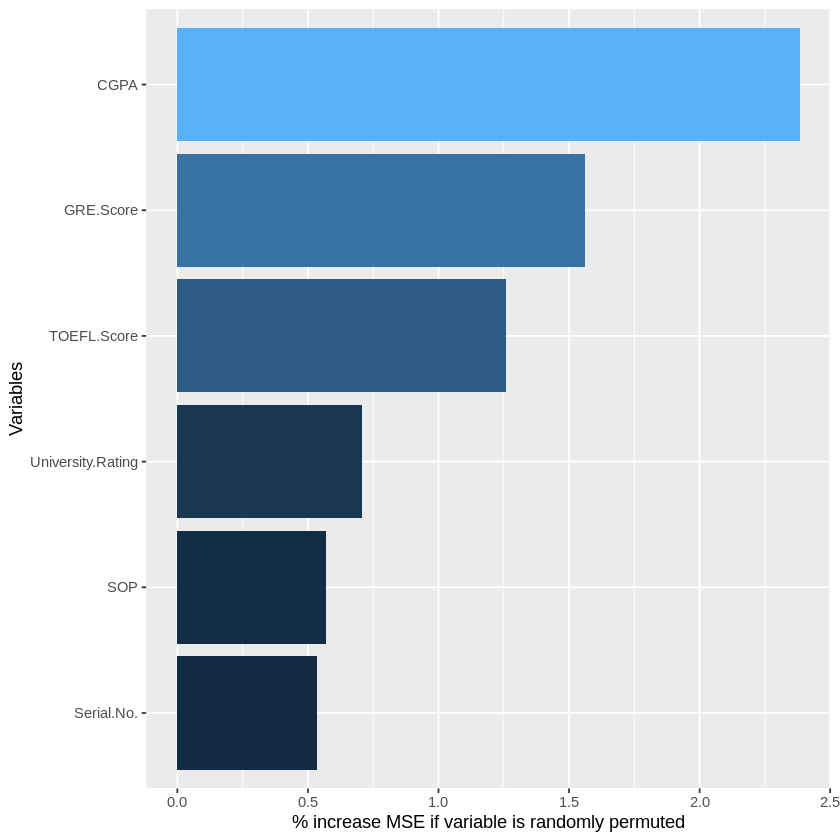

In [ ]:
set.seed(222)
rdf<-randomForest(all$Chance.of.Admit~.,data=all,na.action = na.roughfix)
imp_RF <- importance(rdf)
imp_DF <- data.frame(Variables = row.names(imp_RF), MSE = imp_RF[,1])
imp_DF <- imp_DF[order(imp_DF$MSE, decreasing = TRUE),]
ggplot(imp_DF[1:6,], aes(x=reorder(Variables, MSE), y=MSE, fill=MSE)) + geom_bar(stat = 'identity') + labs(x = 'Variables', y= '% increase MSE if variable is randomly permuted') + coord_flip() + theme(legend.position="none")

There are 8 numeric variables

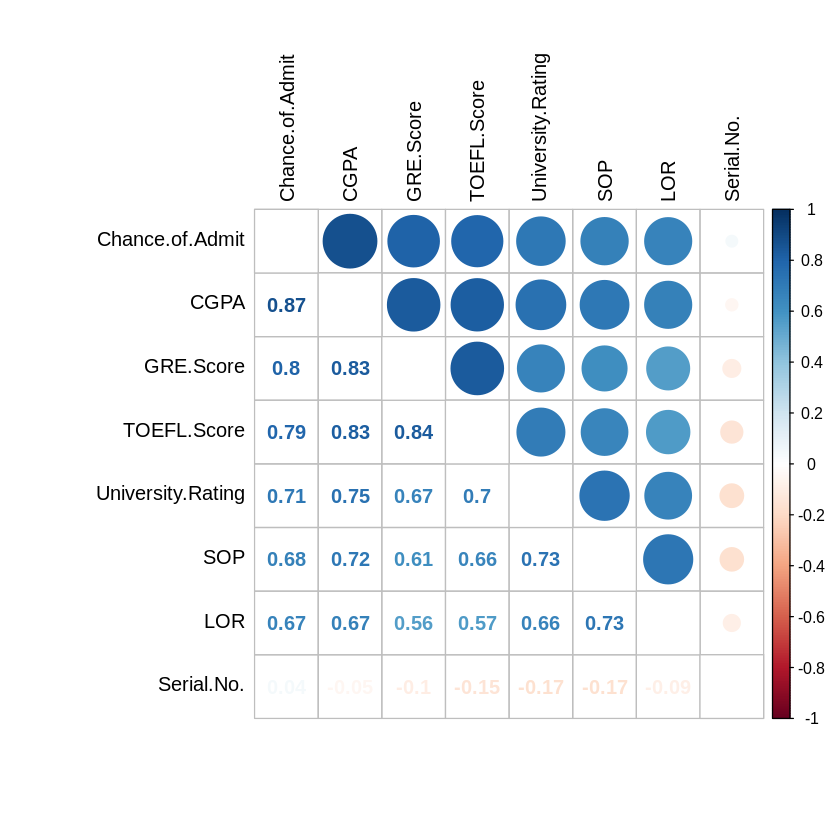

In [ ]:
numericVars <- which(sapply(all, is.numeric)) #index vector numeric variables
numericVarNames <- names(numericVars) #saving names vector for use later on
cat('There are', length(numericVars), 'numeric variables')
all_numVar <- all[, numericVars]
cor_numVar <- cor(all_numVar, use="pairwise.complete.obs") #correlations of all numeric variables

#sort on decreasing correlations with SalePrice
cor_sorted <- as.matrix(sort(cor_numVar[,'Chance.of.Admit'], decreasing = TRUE))
 #select only high corelations
CorHigh <- names(which(apply(cor_sorted, 1, function(x) abs(x)>0)))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")

Warning message:
“Use of `all$CGPA` is discouraged. Use `CGPA` instead.”
Warning message:
“Use of `all$Chance.of.Admit` is discouraged. Use `Chance.of.Admit` instead.”
`geom_smooth()` using formula 'y ~ x'



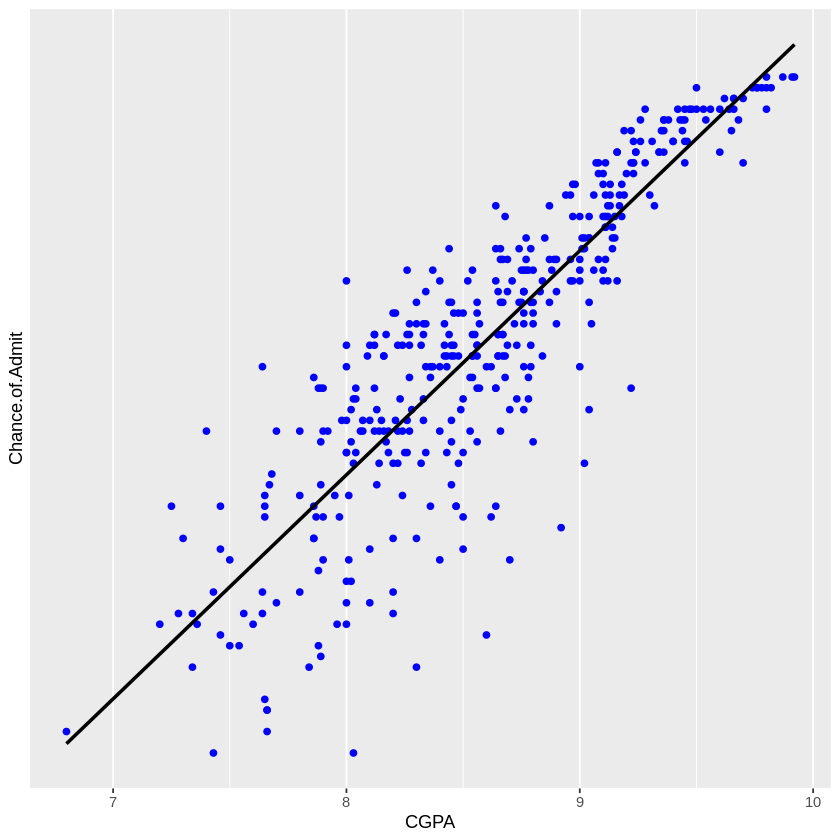

In [ ]:
ggplot(data=all[!is.na(all$Chance.of.Admit),], aes(x=CGPA, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma) +
        geom_text_repel(aes(label = ifelse(all$CGPA[!is.na(all$Chance.of.Admit)]>4500, rownames(all), '')))

Warning message:
“Use of `all$GRE.Score` is discouraged. Use `GRE.Score` instead.”
Warning message:
“Use of `all$Chance.of.Admit` is discouraged. Use `Chance.of.Admit` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `all$TOEFL.Score` is discouraged. Use `TOEFL.Score` instead.”
Warning message:
“Use of `all$Chance.of.Admit` is discouraged. Use `Chance.of.Admit` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `all$University.Rating` is discouraged. Use `University.Rating` instead.”
Warning message:
“Use of `all$Chance.of.Admit` is discouraged. Use `Chance.of.Admit` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `all$SOP` is discouraged. Use `SOP` instead.”
Warning message:
“Use of `all$Chance.of.Admit` is discouraged. Use `Chance.of.Admit` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `all$LOR` is discouraged. Use `LOR` instead.”
Warning message:
“Use of `all$Chance.of.Admit` is dis

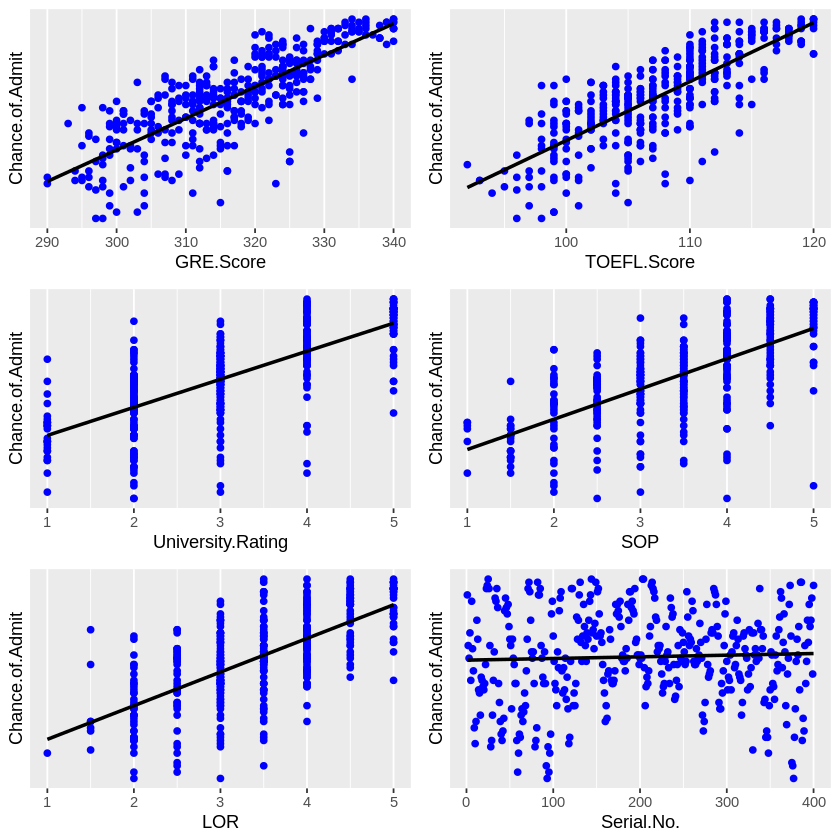

In [ ]:
p1<-ggplot(data=all[!is.na(all$Chance.of.Admit),], aes(x=GRE.Score, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma) +
        geom_text_repel(aes(label = ifelse(all$GRE.Score[!is.na(all$Chance.of.Admit)]>4500, rownames(all), '')))
p2<-ggplot(data=all[!is.na(all$Chance.of.Admit),], aes(x=TOEFL.Score, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma) +
        geom_text_repel(aes(label = ifelse(all$TOEFL.Score[!is.na(all$Chance.of.Admit)]>4500, rownames(all), '')))
p3<-ggplot(data=all[!is.na(all$Chance.of.Admit),], aes(x=University.Rating, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma) +
        geom_text_repel(aes(label = ifelse(all$University.Rating[!is.na(all$Chance.of.Admit)]>4500, rownames(all), '')))
p4<-ggplot(data=all[!is.na(all$Chance.of.Admit),], aes(x=SOP, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma) +
        geom_text_repel(aes(label = ifelse(all$SOP[!is.na(all$Chance.of.Admit)]>4500, rownames(all), '')))
p5<-ggplot(data=all[!is.na(all$Chance.of.Admit),], aes(x=LOR, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma) +
        geom_text_repel(aes(label = ifelse(all$LOR[!is.na(all$Chance.of.Admit)]>4500, rownames(all), '')))
p6<-ggplot(data=all[!is.na(all$Chance.of.Admit),], aes(x=Serial.No., y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma) +
        geom_text_repel(aes(label = ifelse(all$Serial.No.[!is.na(all$Chance.of.Admit)]>4500, rownames(all), '')))
grid.arrange(p1,p2,p3,p4,p5,p6)

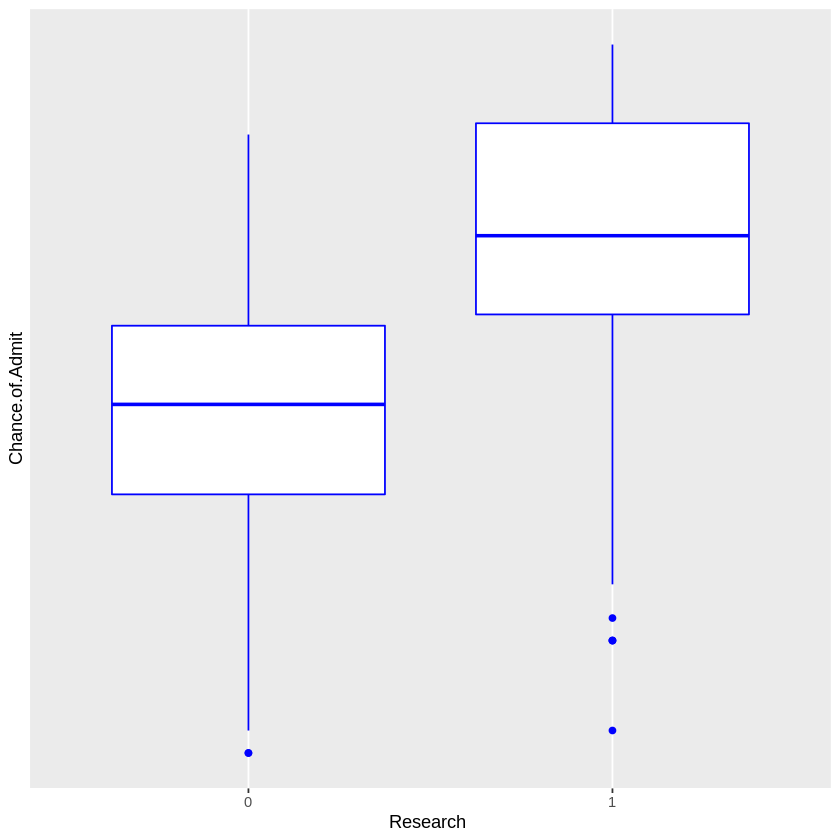

In [ ]:
ggplot(data=all[!is.na(all$Chance.of.Admit),], aes(x=factor(Research), y=Chance.of.Admit))+
        geom_boxplot(col='blue') + labs(x='Research ') +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma)

In [ ]:
index <- sample(2,nrow(all),replace= TRUE,prob=c(0.7,0.3))
trainClean <- all[index==1,]
testClean <- all[index==2,]
trainClean<-trainClean[,2:9]
testClean<-testClean[,2:9]

In [ ]:
model_lm <- lm(trainClean$Chance.of.Admit~., data =trainClean)
summary(model_lm)


Call:
lm(formula = trainClean$Chance.of.Admit ~ ., data = trainClean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26112 -0.02377  0.01097  0.03485  0.16107 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.2188197  0.1446519  -8.426 1.92e-15 ***
GRE.Score          0.0016190  0.0006782   2.387 0.017648 *  
TOEFL.Score        0.0030568  0.0012779   2.392 0.017419 *  
University.Rating  0.0020478  0.0054107   0.378 0.705365    
SOP               -0.0016552  0.0065657  -0.252 0.801150    
LOR                0.0251408  0.0063947   3.931 0.000107 ***
CGPA               0.1164071  0.0144423   8.060 2.25e-14 ***
Research1          0.0298911  0.0093418   3.200 0.001534 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06242 on 279 degrees of freedom
Multiple R-squared:  0.8081,	Adjusted R-squared:  0.8033 
F-statistic: 167.8 on 7 and 279 DF,  p-value: < 2.2e-16


In [ ]:
#use predict() to make prediction on a new set
pred1 <- predict(model_lm,testClean,type = "response")
residuals <- testClean$Chance.of.Admit - pred1
linreg_pred <- data.frame("Predicted" = pred1, "Actual" = testClean$Chance.of.Admit, "Residual" = residuals)
accuracy(pred1, testClean$Chance.of.Admit)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.01029095,0.06761906,0.04734718,-2.748254,7.662419


In [ ]:
x <- model.matrix(all$Chance.of.Admit~., all[,-1])[,-1]
y <- all$Chance.of.Admit
lambda <- 10^seq(10, -2, length = 100)

In [ ]:
chargeslm <- lm(trainClean$Chance.of.Admit~., data = trainClean)
coef(chargeslm)

(Intercept)         GRE.Score       TOEFL.Score University.Rating 
     -1.218819739       0.001619000       0.003056798       0.002047832 
              SOP               LOR              CGPA         Research1 
     -0.001655194       0.025140807       0.116407114       0.029891079

In [ ]:
ridge.mod <- glmnet(x, y, alpha = 0, lambda = lambda)
coef.glmnet(ridge.mod)

   [[ suppressing 100 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



8 x 100 sparse Matrix of class "dgCMatrix"
                                                                     
(Intercept)       7.243500e-01 7.243500e-01 7.243500e-01 7.243500e-01
GRE.Score         1.420874e-13 1.878312e-13 2.483018e-13 3.282404e-13
TOEFL.Score       2.649116e-13 3.501975e-13 4.629405e-13 6.119801e-13
University.Rating 1.263141e-12 1.669799e-12 2.207375e-12 2.918020e-12
SOP               1.363182e-12 1.802047e-12 2.382200e-12 3.149128e-12
LOR               1.514425e-12 2.001981e-12 2.646501e-12 3.498519e-12
CGPA              2.974631e-12 3.932287e-12 5.198252e-12 6.871784e-12
Research1         2.254713e-12 2.980598e-12 3.940175e-12 5.208680e-12
                                                                     
(Intercept)       7.243500e-01 7.243500e-01 7.243500e-01 7.243500e-01
GRE.Score         4.339145e-13 5.736095e-13 7.582779e-13 1.002399e-12
TOEFL.Score       8.090016e-13 1.069453e-12 1.413753e-12 1.868899e-12
University.Rating 3.857451e-12 5.099324e-12 6.7

In [ ]:
set.seed(489)
train = sample(1:nrow(x), nrow(x)/2)
test = (-train)
ytest = y[test]

In [ ]:
Chance.of.Admitlm <- lm(all$Chance.of.Admit~., data = all, subset = train)
ridge.mod <- glmnet(x[train,], y[train], alpha = 0, lambda = lambda)
#find the best lambda from our list via cross-validation
cv.out <- cv.glmnet(x[train,], y[train], alpha = 0)

In [ ]:
bestlam <- cv.out$lambda.min
#make predictions
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x[test,])
s.pred <- predict(Chance.of.Admitlm, newdata = all[test,])
#check MSE
mean((s.pred-ytest)^2)

[1] 0.004659911

In [ ]:
mean((ridge.pred-ytest)^2)

[1] 0.005049551

In [ ]:
out = glmnet(x[train,],y[train],alpha = 0)
predict(ridge.mod, type = "coefficients", s = bestlam)[1:6,]

(Intercept)         GRE.Score       TOEFL.Score University.Rating 
     -1.133741018       0.001668148       0.003506269       0.001409922 
              SOP               LOR 
      0.011957058       0.016690443

In [ ]:
lasso.mod <- glmnet(x[train,], y[train], alpha = 1, lambda = lambda)
lasso.pred <- predict(lasso.mod, s = bestlam, newx = x[test,])
#cheek MSE
mean((lasso.pred-ytest)^2)

[1] 0.0053632

In [ ]:
lasso.coef  <- predict(lasso.mod, type = 'coefficients', s = bestlam)[1:6,]
lasso.coef

(Intercept)         GRE.Score       TOEFL.Score University.Rating 
    -0.9949503138      0.0009086477      0.0023875450      0.0000000000 
              SOP               LOR 
     0.0069370769      0.0079701582